<a href="https://colab.research.google.com/github/YunYoungHwa/younghwa/blob/master/cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc

from keras.datasets import cifar10

import numpy as np


In [13]:
def build_model(width,height,channel):
  model=Sequential()

  model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(width, height, channel) #어떤 사이즈의 이미지가 들어올 건지 정의
  ))
  model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
  ))
  model.add(MaxPooling2D( #각 길이가 1/2로 줄어듦
        pool_size=(2,2),
        padding='same'
  ))

  model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
  ))
  model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
  ))
  model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
  ))
  model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
  ))
  model.add(AveragePooling2D(
        pool_size=(8,8),
        padding='same'
  ))

  model.add(Flatten())
  model.add(Dense(
        units=640,
        activation='relu'
  ))
  model.add(Dense(
        units=10,
        activation='softmax'
  ))

  opt = Adam(learning_rate=0.001)
  model.compile(
        optimizer=opt,
        loss=scc,
        metrics=['accuracy']
    )

  return model

 

In [14]:
def data_preprocessing():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    mean=[0,0,0]
    std=[0,0,0]
    newX_train = np.ones(X_train.shape)
    newX_test = np.ones(X_test.shape)
    #train set에 있는 데이터로만 평균과 표준편차를 구함
    for i in range(3):
        mean[i] = np.mean(X_train[:,:,:,i])
        std[i] = np.std(X_train[:,:,:,i])

    #train과 test셋 모두 정규화 작업    
    for i in range(3):
        newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
        newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
        newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
        newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
            
    X_train = newX_train
    X_test = newX_test

    return (X_train, Y_train), (X_test, Y_test)

In [15]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

model = build_model(X_train.shape[1],X_train.shape[2],X_train.shape[3] )
hist= model.fit(
    X_train, Y_train,
    batch_size=32,    #32개마다 학습
    epochs=40,
    verbose=1,
    shuffle=True, validation_split=0.05  
)
model.evaluate(X_test,Y_test,verbose=1)


Epoch 1/40
1485/1485 [==============================] - 5s 3ms/step - loss: 1.5805 - accuracy: 0.4160 - val_loss: 1.2644 - val_accuracy: 0.5360
Epoch 2/40
1485/1485 [==============================] - 5s 3ms/step - loss: 1.1954 - accuracy: 0.5716 - val_loss: 1.0643 - val_accuracy: 0.6152
Epoch 3/40
1485/1485 [==============================] - 5s 3ms/step - loss: 1.0272 - accuracy: 0.6321 - val_loss: 0.9349 - val_accuracy: 0.6672
Epoch 4/40
1485/1485 [==============================] - 5s 3ms/step - loss: 0.9170 - accuracy: 0.6747 - val_loss: 0.8957 - val_accuracy: 0.6892
Epoch 5/40
1485/1485 [==============================] - 5s 3ms/step - loss: 0.8310 - accuracy: 0.7065 - val_loss: 0.8644 - val_accuracy: 0.7012
Epoch 6/40
1485/1485 [==============================] - 5s 3ms/step - loss: 0.7723 - accuracy: 0.7276 - val_loss: 0.7752 - val_accuracy: 0.7312
Epoch 7/40
1485/1485 [==============================] - 5s 3ms/step - loss: 0.7173 - accuracy: 0.7448 - val_loss: 0.7942 - val_accuracy:

[1.374503493309021, 0.7208999991416931]

In [16]:
import matplotlib.pyplot as plt

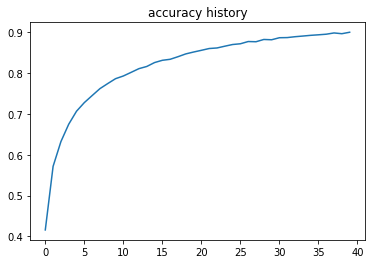

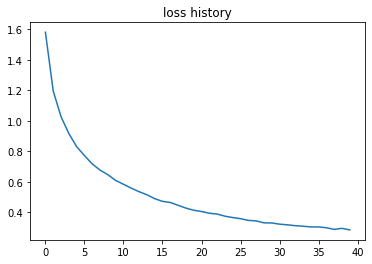

In [17]:
plt.plot(hist.history['accuracy'])
plt.title("accuracy history")

plt.show()

plt.plot(hist.history['loss'])
plt.title("loss history")

plt.show()